#Hypothesis

- Hypothesis 1
How much money did customers spend in August 2018?

- Hypothesis 2
Which country has spent the most funds in expenditures throughout this available data?

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st
from babel.numbers import format_currency

#Data Wrangling

##Gathering Data

In [ ]:
customer_df= pd.read_csv('customers_dataset.csv')
orderitem_df= pd.read_csv('order_items_dataset.csv')
orderpay_df= pd.read_csv('order_payments_dataset.csv')
orders_df= pd.read_csv('orders_dataset.csv')
product_df= pd.read_csv('products_dataset.csv')

In [ ]:
customer_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [ ]:
customer_df.tail(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99431,be842c57a8c5a62e9585dd72f22b6338,ca186065de6e2d01cfc99763e6d62048,99150,marau,RS
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP
99433,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,66033,belem,PA
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [ ]:
orderitem_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [ ]:
orderitem_df.tail(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [ ]:
orderpay_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [ ]:
orderpay_df.tail(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103876,0872d0faafe0cb56e6f2c594cca1522c,1,credit_card,2,127.92
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11
103878,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [ ]:
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [ ]:
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [ ]:
product_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [ ]:
product_df.tail(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32941,6ec96c91757fad0aecafc0ee7f262dcc,bebes,62.0,1417.0,1.0,9550.0,36.0,35.0,35.0
32942,16280ca280a86fee2ba3c928ed04439f,moveis_decoracao,64.0,236.0,11.0,2200.0,31.0,11.0,26.0
32943,3becff10d1deb92b02f2a1ee62a04524,informatica_acessorios,54.0,1520.0,2.0,6150.0,30.0,30.0,20.0
32944,1a14237ecc2fe3772b55c8d4e11ccb35,moveis_decoracao,58.0,1405.0,3.0,150.0,35.0,2.0,25.0
32945,c4e71b64511b959455e2107fe7859020,utilidades_domesticas,59.0,1371.0,2.0,200.0,18.0,15.0,15.0
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


##Assessing Data

###Assessing the `customer_df` table

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
customer_df.duplicated().sum()

0

In [ ]:
customer_df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [ ]:
customer_df.describe(include= "all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


###Assessing the `orderitem_df` table

In [ ]:
orderitem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
orderitem_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
orderitem_df.duplicated().sum()

0

In [ ]:
orderitem_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [ ]:
orderitem_df.describe(include= "all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


###Assessing the `orders_df` table

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders_df.duplicated().sum()

0

In [ ]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


###Assessing the `orderspay_df` table

In [ ]:
orderpay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
orderpay_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
orderpay_df.duplicated().sum()

0

In [ ]:
orderpay_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [ ]:
orderpay_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


###Assessing the `product_df` table

In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
product_df.duplicated().sum()

0

In [ ]:
product_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [ ]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


##Cleaning Data

###Missing Value

####`orders_df`

In [ ]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
#Take the data with the status 'delivered,' assuming that the rest are orders that are not yet completed
order= orders_df[orders_df['order_status']== 'delivered']

In [ ]:
order.shape

(96478, 8)

In [ ]:
order = order.sort_values(by='order_delivered_customer_date')

In [ ]:
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])

In [ ]:
order.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [ ]:
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'], errors='coerce')
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'], errors='coerce')
order['order_delivered_customer_date'] = order['order_delivered_customer_date'].fillna(order['order_estimated_delivery_date'])

In [ ]:
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'], errors='coerce')
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'], errors='coerce')
order['order_delivered_carrier_date'] = order['order_delivered_carrier_date'].fillna(order['order_approved_at'])

In [ ]:
order.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [ ]:
order.describe(include="all")

<ipython-input-504-e0d93943617e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order.describe(include="all")
<ipython-input-504-e0d93943617e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order.describe(include="all")
<ipython-input-504-e0d93943617e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order.describe(include="all")
<ipython-input-504-e0d93943617e>:1: FutureWarning: Trea

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96478,96478,96478,96478,96464,96478,96478,96478
unique,96478,96478,1,95956,88274,80108,95665,445
top,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,507
first,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,NaN,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


####`product_df`

In [ ]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
product_df['product_category_name'] = product_df['product_category_name'].fillna(method='bfill')
# pad = value before, bfill = value after
product_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
product_df['product_name_lenght'] = product_df['product_name_lenght'].fillna(method='bfill')
# pad = value before, bfill = value after
product_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
product_df['product_description_lenght'] = product_df['product_description_lenght'].fillna(method='bfill')
# pad = value before, bfill = value after
product_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght      0
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
product_df['product_photos_qty'] = product_df['product_photos_qty'].fillna(method='bfill')
# pad = value before, bfill = value after
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [ ]:
product_df['product_weight_g'] = product_df['product_weight_g'].fillna(method='bfill')
# pad = value before, bfill = value after
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [ ]:
product_df['product_length_cm'] = product_df['product_length_cm'].fillna(method='bfill')
# pad = value before, bfill = value after
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             2
product_width_cm              2
dtype: int64

In [ ]:
product_df['product_height_cm'] = product_df['product_height_cm'].fillna(method='bfill')
# pad = value before, bfill = value after
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              2
dtype: int64

In [ ]:
product_df['product_width_cm'] = product_df['product_width_cm'].fillna(method='bfill')
# pad = value before, bfill = value after
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#Expolaratory Data Analysis `EDA`

##Explore`customer_df`

In [ ]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
81172,2c4f8a56ddfef3b48ea8d9b2bf5a8ffa,d5b734ecc9e1a1382c6826921ee9368d,89340,itaiopolis,SC
13399,3fae8ef52f0b321ad67be42e3fa8be08,a50cc3901be0c3e558bdf9fc876eec70,37280,candeias,MG
10934,cdfe21141f5df77ba0fb20bef6621a9f,396e89f9a8b20de569b4f649539028db,8421,sao paulo,SP
94827,5b123ce643eaafed4841bf3cbf1d2bd0,65663adf8c7a498b79e57ff84ab2b654,20271,rio de janeiro,RJ
54445,d644a47b90ddb3ccb2933fc4a732cedc,af85314ef8ae02a1a824f6f31936cd96,23064,rio de janeiro,RJ


In [ ]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customer_df.customer_id.duplicated().sum()

0

In [ ]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

##Explore `order`

In [ ]:
order.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
612,d396adb7e51ca1bcb4a84cb786fee813,33a366be73843c5da3d68f3d3427afd6,delivered,2017-07-03 16:42:42,2017-07-05 06:44:25,2017-07-12 20:47:52,2017-08-01 21:10:36,2017-08-04
43066,219889e4dae6af086c47d02b538f0589,d78bbbce2fca1d884f9e8ae8fc4cedc4,delivered,2018-01-10 07:26:34,2018-01-10 10:32:13,2018-01-11 23:42:16,2018-01-23 16:09:19,2018-02-07
9986,a49eb42293ae3b9a95fec7071eec16f8,bb5ac18a2f77c3d7e78c2b3bb7171c63,delivered,2018-02-01 14:19:56,2018-02-02 02:54:21,2018-02-03 10:52:46,2018-02-19 12:59:09,2018-03-09
74698,fc2fce216ba47a84e54367275351c67a,152e0f1f108e8820600a9572e1cc8107,delivered,2018-01-09 18:56:38,2018-01-10 10:31:43,2018-01-10 19:38:29,2018-01-25 16:37:54,2018-02-06
98353,db5439de7f77d9b66eb4f4de0d9b922c,c0082191755f56bc40cc7dbca5a676ca,delivered,2017-11-28 20:24:51,2017-11-29 02:16:43,2017-12-05 20:45:36,2017-12-12 20:27:40,2017-12-20


In [ ]:
delivery_time = order["order_delivered_customer_date"] - order["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order["delivery_time"] = round(delivery_time/86400)

In [ ]:
order.sample(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
9141,7267e79548a97a01f870d9554ecbf645,da7e8bf45b833573fe1076e763befd95,delivered,2017-11-28 21:55:46,2017-12-01 10:31:31,2017-12-01 22:28:59,2017-12-18 20:04:13,2017-12-18,17.0
93885,63cb128cde71b3b1a6cc68b0c39cb66a,6bf35e4f434dccd3b07ca51958fd1a80,delivered,2017-11-16 22:54:35,2017-11-16 23:05:36,2017-11-22 17:13:01,2017-12-06 19:33:21,2017-12-15,14.0
38741,b1790ff077b7630f790bba65c012c64b,3f2d49651aac6322e00f50492dab09dc,delivered,2018-06-20 15:04:55,2018-06-20 15:40:12,2018-06-20 15:39:00,2018-06-25 15:52:39,2018-07-24,5.0
90284,659c757231085ed35dafa16a50fa16e8,7a0587a22e604b216a8ef5c8ce07d7fe,delivered,2018-02-04 20:39:14,2018-02-04 20:56:08,2018-02-08 19:16:44,2018-02-20 18:28:00,2018-03-05,12.0
15590,654b59e70552dabe9932c36967607cfc,a8df01b4468008cc56f702a059a898e5,delivered,2017-07-25 23:32:39,2017-07-25 23:45:14,2017-07-26 18:09:30,2017-07-28 14:12:23,2017-08-10,2.0
6322,f716dffba1232aaef7c899fb8c14db97,cf5112cc5129776cc69c956dc265a5f7,delivered,2016-10-07 15:12:40,2016-10-07 15:59:25,2016-10-11 15:59:26,2016-10-14 15:59:26,2016-11-25,3.0


In [ ]:
order.describe(include="all")

<ipython-input-522-e0d93943617e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order.describe(include="all")
<ipython-input-522-e0d93943617e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order.describe(include="all")
<ipython-input-522-e0d93943617e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order.describe(include="all")
<ipython-input-522-e0d93943617e>:1: FutureWarning: Trea

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96478,96478,96478,96478,96464,96478,96478,96478,96478.000000
unique,96478,96478,1,95956,88274,80108,95665,445,NaN
top,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,47,3,507,NaN
first,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.293466
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.777907
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


<Axes: >

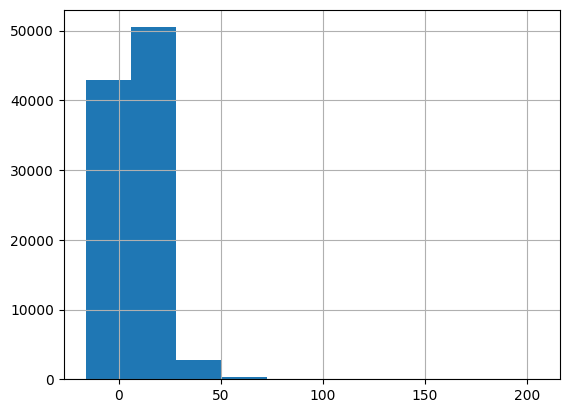

In [ ]:
order.delivery_time.hist()

##Explore `order` & `customer_df`

###Combining `order` and `customer_df`

In [ ]:
orders_customers_df = pd.merge(
    left=order,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

cust_final_df = pd.merge(
    left=orders_customers_df,
    right=orderitem_df,
    how='left',
    left_on='order_id',
    right_on='order_id')
cust_final_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
35707,02c371100bf54facae80322579c7fefb,ad6f2686bc9a43070103abf4021c6e35,delivered,2017-11-07 02:55:51,2017-11-07 06:31:37,2017-11-10 19:48:03,2017-11-16 21:07:58,2017-11-21,6.0,57687546c853c106a30036e7c483dc7d,11065,santos,SP,1,3104dbf304c25fa1812a11ad924f8b57,e62b2d6ac10570a035a30bafcf01d263,2017-11-13 03:10:23,49.90,9.34
44699,1b6f2f7f803e2c324492721f9e83211d,e2a5b7496e1b7f7852b00fafbcd3bb52,delivered,2017-12-07 16:53:03,2017-12-08 15:52:54,2017-12-11 18:18:41,2017-12-20 20:17:21,2018-01-04,9.0,cc989a70265b71849838721cb00dfb4b,7073,guarulhos,SP,1,3625fbaf8284047185fb0351f2f84ae3,ef990a83bbea832f36ebe81376335aa8,2017-12-14 15:52:54,158.80,17.36
93610,c08207456235b73fe23b3f65986d6856,2ca853a08e9b198cd7b6580af003ed5a,delivered,2018-06-12 22:06:37,2018-06-14 02:17:15,2018-06-20 15:57:00,2018-06-28 20:05:40,2018-07-13,8.0,fd25ac83f8684107dea63fc4b864d777,89291,sao bento do sul,SC,1,893b9464c6ab7f700148fe9db838b6b4,55bb6fe5bebe5012e2d7d9928e1128ff,2018-06-20 02:17:15,129.90,116.94
84284,f15016a558849089056c7b9fb908ebba,bed5a20076049bad6c703bb683e0d1fc,delivered,2018-05-02 10:22:32,2018-05-02 10:35:14,2018-05-02 13:36:00,2018-05-21 13:36:32,2018-06-01,19.0,a74c55db1520986fe4c117a54a0fc287,98700,ijui,RS,1,79da264732f717f10ebf5d102aa6c32a,562fc2f2c2863ab7e79a9e4388a58a14,2018-05-08 10:35:14,29.99,18.23
92095,25e8002575a945e8d4ae84ca208daa50,e8ab8f389636432382f031e90d3606bb,delivered,2018-06-18 07:49:22,2018-06-19 04:16:56,2018-06-19 15:47:00,2018-06-22 15:45:51,2018-07-05,3.0,42832ed9903e18991afc347bb4c28dac,17050,bauru,SP,1,66421745b3128972e1b0dcb3123e8c1d,1f50f920176fa81dab994f9023523100,2018-06-21 04:16:56,79.90,24.17


In [ ]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15045
rio de janeiro            6601
belo horizonte            2697
brasilia                  2071
curitiba                  1489
campinas                  1406
porto alegre              1342
salvador                  1188
guarulhos                 1144
sao bernardo do campo      911
Name: order_id, dtype: int64

In [ ]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    40501
RJ    12350
MG    11354
RS     5345
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1279
PA      946
MT      886
MA      717
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: order_id, dtype: int64

##Explore `product_df`

In [ ]:
product_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6650,644c433cb1ef2cc92f9502a618c371be,relogios_presentes,41.0,734.0,1.0,417.0,18.0,11.0,12.0
3099,de2ac390da8e5e9cc2c6bc88d5c5357f,relogios_presentes,41.0,438.0,1.0,400.0,20.0,14.0,16.0
16114,27ea0ddcb5e3a371b14a9ef16607676f,construcao_ferramentas_ferramentas,44.0,999.0,1.0,1721.0,21.0,20.0,21.0
10436,8c154410716f31649d25e436f7d5d838,beleza_saude,46.0,803.0,1.0,250.0,22.0,3.0,15.0
5365,17b9f231d057710012fe28e5a1ac5186,eletronicos,46.0,1047.0,2.0,10600.0,40.0,40.0,30.0
19354,9ef3514cbcbf73d8b7d294036f99737f,utilidades_domesticas,53.0,1708.0,3.0,1650.0,69.0,10.0,40.0
2802,c98bf47f7bea8f3aee82fa023786b8a1,eletronicos,33.0,63.0,1.0,6185.0,63.0,11.0,20.0
15935,dd47440cb56de3ab674f9208ff0edc3e,informatica_acessorios,58.0,956.0,3.0,2550.0,30.0,10.0,22.0
23753,c5f5b4b17e4cd989c39986cd0dddc018,moveis_decoracao,55.0,329.0,2.0,350.0,16.0,16.0,16.0
27913,8b41f2becf919f6177cca1ff15dfd311,livros_tecnicos,41.0,1362.0,1.0,1550.0,29.0,5.0,21.0


In [ ]:
product_df.product_category_name.value_counts()

cama_mesa_banho                  3075
esporte_lazer                    2911
moveis_decoracao                 2716
beleza_saude                     2479
utilidades_domesticas            2388
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [ ]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.474978,770.661346,2.188644,2276.663591,30.815605,16.937574,23.197445
std,NaN,NaN,10.244713,634.642045,1.736386,4282.124152,16.914360,13.637239,12.079757
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,594.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,971.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


##Explore `orderpay_df`

In [ ]:
orderpay_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
98942,754af8a169601b3ad5dc333db745b158,1,credit_card,10,106.11
75689,6e84c551c9c07b3b8b97fd837d7fb548,1,credit_card,2,27.09
14725,008fab5602c441d51f30b1464f5d4643,1,credit_card,1,65.55
86654,7384cdc62fcd832cd6c6026440c42821,1,credit_card,2,197.02
84427,b40f817b50535e75d1708b22ef4f6484,1,credit_card,1,29.38


In [ ]:
orderpay_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


##Combining `orderpay_df` and `product_df`

In [ ]:
orders_product_df = pd.merge(
    left=orderpay_df,
    right=cust_final_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_product_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
70423,5f8e8bff26bd07b73a3ecf086de33d4a,1,voucher,1,107.48,6233e1c1b76b3f0e1527afdd8db0c7a1,delivered,2018-08-12 22:56:51,2018-08-13 22:50:15,2018-08-14 12:56:00,...,aad99270bc43606a7af9647b7a7de9e4,96077.0,pelotas,RS,2.0,d19284bf0893e07e80c26fe4ad33458e,79ebd9a61bac3eaf882805ed4ecfa12a,2018-08-21 22:50:15,134.90,42.71
103034,7e77eb1830c5ca91d26012b8e0fed483,1,boleto,1,175.56,d4a482cbaeecc8d8bf7c2e5d38fc5898,delivered,2017-12-15 11:24:06,2017-12-16 02:51:45,2017-12-19 20:04:31,...,dc1ebb3411fb6921b469b113b93ff80c,27320.0,barra mansa,RJ,1.0,4fcb3d9a5f4871e8362dfedbdb02b064,8581055ce74af1daba164fdbd55a40de,2017-12-21 02:51:45,143.80,31.76
448,6df674fd09d933a85574460e32a94e23,1,credit_card,2,65.71,49a332427c5be4c418541be8753c5238,delivered,2018-02-13 18:37:48,2018-02-13 18:50:33,2018-02-14 19:12:36,...,4847d361361a3440824346865cf03f83,13308.0,itu,SP,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2018-02-22 17:50:33,56.99,8.72
107499,b6f445cf5a3df2567435ce41a1ad3708,1,credit_card,10,102.90,8dfffab81aa1ae858598d70c91b69122,delivered,2017-07-24 13:40:42,2017-07-25 21:45:10,2017-07-26 18:49:46,...,b1df71e54705d81ffb072b96035fcd83,58035.0,joao pessoa,PB,1.0,893457b85c57941d73e5e016da350ddb,7142540dd4c91e2237acb7e911c4eba2,2017-07-31 21:45:10,64.90,38.00
20063,91d9a72e928a84866b4d506c0398b723,1,boleto,1,51.84,ec2e54a792562c4c44e08612cfbf4327,delivered,2017-12-27 22:11:06,2017-12-29 02:09:23,2018-01-05 19:47:39,...,b486c3fab295f260097133cbcf879fa2,13710.0,tambau,SP,1.0,87ae34a2e6f971a135f8bea5ae7949a9,ea8482cd71df3c1969d7b9473ff13abc,2018-01-05 02:09:23,39.99,11.85


##`final_df`

In [ ]:
final_df = pd.merge(
    left=orders_product_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
final_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
97184,110da2b3965b649ac4bb999200ab9133,1,credit_card,1,68.51,979f7f0b911e84cf3ea55247fa147bd5,delivered,2018-06-27 17:21:22,2018-06-27 17:35:11,2018-07-04 12:02:00,...,47.90,20.61,bebes,18.0,1194.0,4.0,650.0,20.0,8.0,14.0
74194,f24bbebc2c8ba687b65f1be751dd8982,1,credit_card,1,45.00,541884ec125bd7f617b86a0f92b8e3b7,delivered,2018-02-20 18:27:39,2018-02-21 18:31:57,2018-02-24 00:51:34,...,29.90,15.10,informatica_acessorios,39.0,1257.0,1.0,130.0,16.0,13.0,13.0
111436,3caf6c286c8cde37ea9c0fb2da0e3169,1,boleto,1,179.76,c8b8fc6a174f7e78125428ff2e452cca,delivered,2018-06-11 09:37:23,2018-06-12 05:15:58,2018-06-13 10:25:00,...,7.90,22.06,cama_mesa_banho,54.0,609.0,1.0,200.0,21.0,10.0,14.0
81269,6b1a5aabdde7ed25268697cef2a9d28a,2,voucher,1,50.00,0addd045c89ed918a0afcca4385c259f,delivered,2017-06-17 08:45:11,2017-06-17 08:55:22,2017-06-19 16:14:00,...,103.99,38.28,eletroportateis,60.0,2438.0,3.0,2050.0,29.0,22.0,24.0
114033,d1922da6bb996e9c76dad9202618a7ca,1,credit_card,6,146.11,dab063fedffcd74dc36cab8ce70d7c29,delivered,2017-02-09 16:01:21,2017-02-09 16:25:13,2017-02-20 16:27:38,...,129.99,16.12,fashion_bolsas_e_acessorios,53.0,825.0,6.0,1000.0,40.0,8.0,40.0


In [ ]:
final_df.describe(include="all")

<ipython-input-534-ae5860e9eebe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_df.describe(include="all")
<ipython-input-534-ae5860e9eebe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_df.describe(include="all")
<ipython-input-534-ae5860e9eebe>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_df.describe(include="all")
<ipython-input-534-ae5860e9eebe>:1: FutureWarn

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,118165,118165.00000,118165,118165.000000,118165.000000,115035,115035,115035,115020,115035,...,115035.000000,115035.00000,115035,115035.000000,115035.000000,115035.000000,115035.000000,115035.000000,115035.000000,115035.000000
unique,99440,NaN,5,NaN,NaN,96477,1,95955,88273,80107,...,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,...,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,63,NaN,87105,NaN,NaN,63,115035,63,63,63,...,NaN,NaN,11746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-04 09:43:32,2016-10-08 10:34:01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-29 15:10:26,2018-09-11 19:48:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.09441,NaN,2.935962,172.323199,NaN,NaN,NaN,NaN,NaN,...,120.083702,19.99557,NaN,48.821550,788.142478,2.206520,2109.026679,30.234937,16.591924,23.064363
std,NaN,0.72909,NaN,2.772336,266.997621,NaN,NaN,NaN,NaN,NaN,...,183.029335,15.74333,NaN,10.004746,653.645346,1.717902,3775.541466,16.129303,13.426468,11.737360
min,NaN,1.00000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,0.850000,0.00000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,1.00000,NaN,1.000000,60.790000,NaN,NaN,NaN,NaN,NaN,...,39.900000,13.08000,NaN,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000


In [ ]:
final_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "order_item_id": "sum",
    "payment_value": "sum"
})

order_item_id  payment_value
customer_city       product_category_name                               
abadia dos dourados cool_stuff                        1.0         219.63
                    esporte_lazer                     1.0         135.59
                    livros_interesse_geral            1.0          58.28
abadiania           eletroportateis                   1.0        1025.52
abaete              bebes                             1.0          82.70
...                                                   ...            ...
ze doca             esporte_lazer                     1.0         188.50
                    ferramentas_jardim                1.0          66.51
                    instrumentos_musicais             1.0         408.04
zortea              beleza_saude                      1.0          46.69
                    informatica_acessorios            1.0          90.88

[25140 rows x 2 columns]

In [ ]:
final_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_item_id": "sum",
    "payment_value": "sum"
})

order_item_id  payment_value
customer_state product_category_name                                    
AC             artigos_de_natal                       1.0         130.85
               automotivo                             5.0         661.91
               bebes                                  3.0         871.97
               beleza_saude                           8.0        2067.62
               brinquedos                             3.0         318.05
...                                                   ...            ...
TO             portateis_casa_forno_e_cafe            1.0        2094.44
               relogios_presentes                    33.0        6719.31
               telefonia                             22.0        2015.52
               telefonia_fixa                         2.0        1444.57
               utilidades_domesticas                 22.0        2005.51

[1364 rows x 2 columns]

In [ ]:
final_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
customer_state,,
SP,40500,5307710.12
RJ,12350,1845341.23
MG,11354,1606284.43
RS,5345,766014.18
PR,4923,688718.43
SC,3546,523714.24
BA,3256,520942.37
DF,2080,306949.63
GO,1957,297983.08


#Visualization & Exploratory Analysis

## Hypothesis 1
How much money did customers spend in August 2018?

In [ ]:
filtered_df= final_df.copy()
start_date = '2018-08-01'
end_date = '2018-08-31'

filtered_df = final_df[(final_df['order_delivered_customer_date'] >= start_date) & (final_df['order_delivered_customer_date'] <= end_date)]

In [ ]:
filtered_df.groupby(by="order_delivered_customer_date").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
order_delivered_customer_date,,
2018-08-15 14:57:50,1,6729.00
2018-08-29 21:46:46,1,4598.00
2018-08-08 22:51:57,1,4399.87
2018-08-28 19:28:43,1,3976.00
2018-08-29 20:03:26,1,3576.00
...,...,...
2018-08-13 12:44:38,1,6.50
2018-08-25 17:18:00,1,5.99
2018-08-28 20:17:39,1,4.99


In [ ]:
income= filtered_df['price'].sum()
income

1180374.19

In [ ]:
fig = px.bar(filtered_df, x= filtered_df.order_delivered_customer_date, y= filtered_df.price, labels={'date' : 'Date', 'price' : 'price'})
fig.update_traces(marker_line_width= 2, opacity= 0.8, marker_line_color= 'orange')
fig.update_layout(title_text= 'Income in August 2018', plot_bgcolor= 'white',
                  font_size= 15, font_color= 'black')
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)
fig.show()

##Hypothesis 2
Which country has spent the most funds in expenditures throughout this available data?

In [ ]:
final_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,price
customer_state,,
SP,40500,5307710.12
RJ,12350,1845341.23
MG,11354,1606284.43
RS,5345,766014.18
PR,4923,688718.43
SC,3546,523714.24
BA,3256,520942.37
DF,2080,306949.63
GO,1957,297983.08


In [ ]:
grouped_df = final_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False)

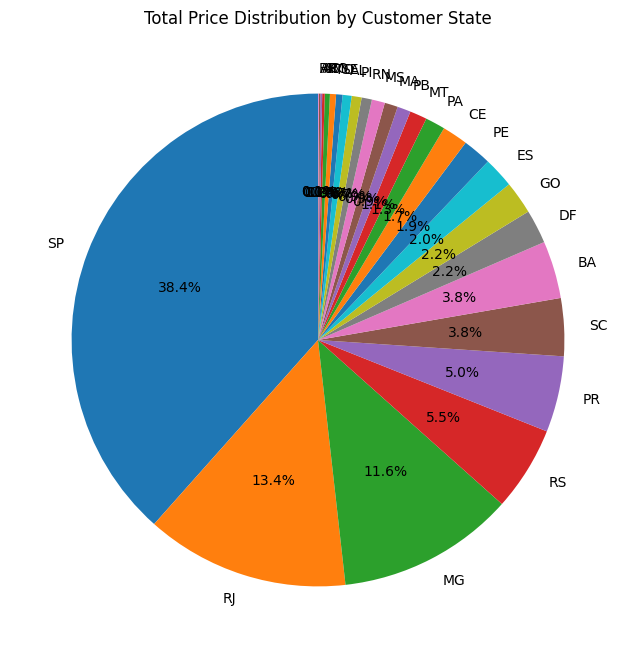

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_df['price'], labels=grouped_df.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Price Distribution by Customer State')
plt.show()

#Conclusion

-  Hypothesis 1

In [ ]:
fig = px.bar(filtered_df, x= filtered_df.order_delivered_customer_date, y= filtered_df.price, labels={'date' : 'Date', 'price' : 'price'})
fig.update_traces(marker_line_width= 2, opacity= 0.8, marker_line_color= 'orange')
fig.update_layout(title_text= 'Income in August 2018', plot_bgcolor= 'white',
                  font_size= 15, font_color= 'black')
fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)
fig.show()

- Hypothesis 2

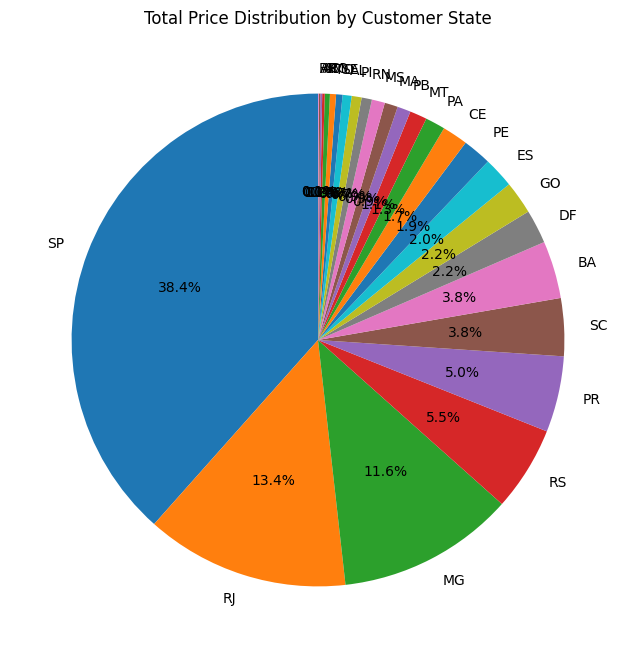

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_df['price'], labels=grouped_df.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Price Distribution by Customer State')
plt.show()